<a href="https://colab.research.google.com/github/gvarnavi/generative-art-iap/blob/master/01.15-Wednesday/cellular_automata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cellular automata in 1D
A cellular automaton is a system of interacting cells on a grid whose future state depends on the states of neighboring cells according to a pre-defined rule. Let's start by looking at cellular automata in one dimension. The following represents a sequence of cells:
![cells](https://drive.google.com/uc?id=1Tk7475unfbg4ngirrVEF7OTwuxb6_W2_)

The state of each cell is represented by a binary value, and in 1D, each cell has two neighbors. Thus, we can look at the "code" formed by considering a cell and its two neighbors in the order left, center, right (LCR).

![triplets](https://drive.google.com/uc?id=13mAjRgJ3nBcVa_8qosi-J_UvozXH98OP)

This binary triplet, such as 011 in the example shown, can be thought of as a unique identifier for that specific neighbor state configuration. We can also convert the representation of the code from binary to decimal.

If our codes are only 3 digits long in binary, how many possible combinations are there? There are $2\times2\times2=8$ possibilities. Thus, our rules for the evolution of cellular automata must prescribe an outcome for each of the 8 possible configurations we can observe. These rules were formalized and extensively studied by Wolfram. Each rule is expressed as an 8-bit binary string, such as the example Rule 30 below:

![rules](https://drive.google.com/uc?id=14v1PEupPk9eOWWUNKzG2BUktb2WN2S48)

For each of the 8 neighbor configurations, the rule defines the state of the **center cell** in the next time step.

We'll begin by writing a function that allows us to simulate cellular automata in one dimension. First, let's implement a helper function that allows us to generate the 8-bit rule representations.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def get_rule(n):
    '''Get the binary representation of a rule. Valid codes are n=0 to n=255.'''
    if n<0 or n>255:
        raise ValueError("Rule index must be between 0 and 255.")
        
    # use a numpy built-in function for converting a number to an 8-bit binary representation.
    rule = np.array([int(i) for i in np.binary_repr(n, 8)], dtype=np.uint8)
    plot_rule(rule, 8) # visualize the rule.
    return rule

def plot_rule(rule, bits):
    fig, ax = plt.subplots(1,1,figsize=(8,8./bits))
    ax.pcolormesh(rule.reshape(1,-1), edgecolors='w', linewidth=1)
    ax.axis('off')
    plt.show()

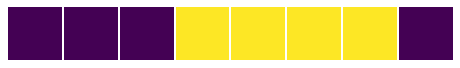

In [3]:
rule = get_rule(30)

There are several different ways to implement the update for cellular automata, which applies a specified rule to a set of cells. Here, we present an approach using **convolution**. A visual representation of discrete convolution is illustrated below:

![convolution](https://drive.google.com/uc?id=1D9xhcj3eDi384xsNZJS6loNjACht4KfD)

A convolution **kernel** scans across an array, here representing the cell states. At each position, the coinciding values of the kernel and array are multiplied, then added together. If the operation is performed cyclically, such that the kernel wraps back to the beginning, the result is a new array of the same size as the original, whose values have been transformed by the kernel.

In the context of cellular automata, we can use convolution to perform binary-to-decimal conversion, by choosing the kernel $[2^2,2^1,2^0]=[4,2,1]$. Thus, we convert all triplet states to their decimal representation, an integer from 0 to 7. Then, we can use this decimal code to find the appropriate next state based on our chosen rule.

![bin2dec](https://drive.google.com/uc?id=1L8XhjPSmLkMRzgNHmFCI4WbAewcYOnAd)

The function ```cellular_automaton``` below performs a simulation of a cellular automaton given a rule, the number of discrete steps to advance in time, and the initial states of the cells. Internally, the ```step``` function applies a 1D convolution to convert the current cell states to their decimal representations, then determine the next states based on the supplied rule.


In [0]:
from scipy.ndimage import convolve1d

def cellular_automaton(rule, steps, init):
    """Simulate a cellular automaton.
    rule - the 8-bit representation of the rule.
    steps - the number of iterations to perform.
    init - the initial state of the cells.
    """
    size = len(init) # get the number of cells.
    cells = np.zeros((steps+1, size), dtype=np.uint8)
    cells[0,:] = init
    
    def step(cells, rule):
        # convolve cells with "converter" array to convert binary LCR triplets
        # to base 10 integers from 0 to 7.
        bin2dec = np.array([4,2,1], dtype=np.int)
        decimal_rep = convolve1d(cells, bin2dec, mode='wrap')

        # Get updated patterns from the rule. Note the rule is written in reverse order
        # (000 corresponds to the leftmost digit, 111 corresponds to the rightmost digit).
        return rule[7 - decimal_rep]
    
    # Apply the step function iteratively.
    for i in range(steps):
        cells[i+1,:] = step(cells[i,:], rule)
    return cells

# simple function to plot states.
def plot_cells(cells):
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    im = ax.imshow(cells, cmap=plt.cm.viridis)
    ax.axis('off')
    return fig, ax, im

Below, we test our implementation on a system of 201 cells following Rule 18. We start by only turning on the center-most cell as our initial condition.

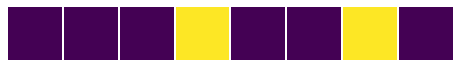

In [5]:
n = 18 # rule to follow
rule = get_rule(n)

N = 201 # number of cells
T = 100  # number of time steps

# set the initial condition to a single "on" cell in the middle.
init = np.zeros(N, dtype=np.uint8); init[N//2] = 1

Run the simulation:

In [0]:
cells = cellular_automaton(rule, T, init)

Plot the cell states, with time advancing as we move down the columns:

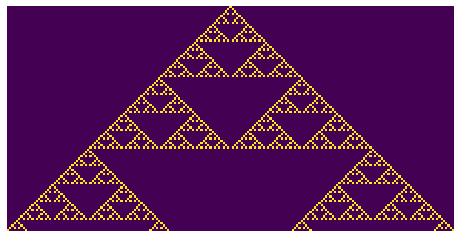

In [7]:
fig, ax, im = plot_cells(cells)
plt.show()

We can also randomly initialize the cell states:

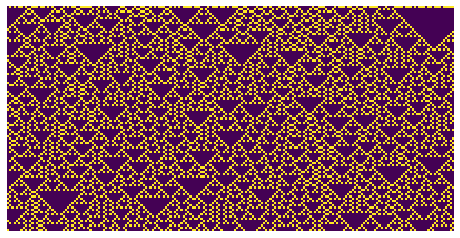

In [8]:
# set a random initial condition.
np.random.seed(12)
init = (np.random.random(N)>0.5).astype(np.uint8)
cells = cellular_automaton(rule, T, init)

fig, ax, im = plot_cells(cells)
plt.show()

Try and experiment with different rules! How many possible rules are there in 1D?

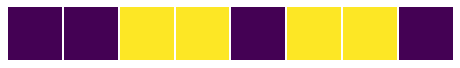

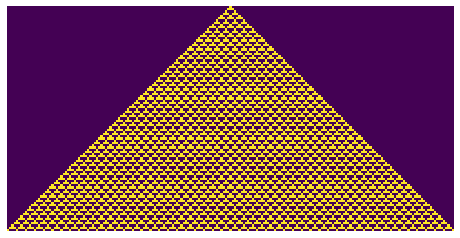

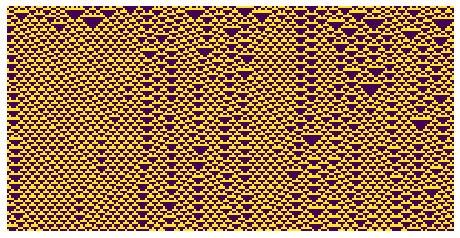

In [9]:
n = 54 # rule to follow
rule = get_rule(n)

# single cell initially on
init = np.zeros(N, dtype=np.uint8); init[N//2] = 1
cells = cellular_automaton(rule, T, init)
fig, ax, im = plot_cells(cells)
plt.show()

# cells randomly on
init = (np.random.random(N)>0.5).astype(np.uint8)
cells = cellular_automaton(rule, T, init)
fig, ax, im = plot_cells(cells)
plt.show()

# Cellular Automata in 2D
The principle of update rules based on nearest-neighbor states can also be extended to 2D. Two types of "neighborhoods" are commonly considered: a 5-cell (von Neumann) and a 9-cell (Moore) neighboorhood. Here, we'll focus on the von Neumann neighborhood.
![neighborhoods](https://drive.google.com/uc?id=1sPTTDRFi-oFaw_QgH1uz6Ij4shNg_kXL)

This means that each neighbor configuration will be represented by a 5-digit binary code instead of a 3-digit code, for a total of $2^5=32$ unique configurations. As a result, our rules will be represented by 32 digits instead of 8. You may have realized that in 1D, there were only $2^8=256$ possible rules. In 2D using a von Neumann neighborhood, there are $2^{32}=4294967296$! To help us explore this vast space of possible combinations, we first write a ```get_rule2d``` helper function with an additional feature to allow for a random fraction of cells to turn on.

In [0]:
def get_rule2d(n, random=False):
    '''Get the binary representation of a rule. This can be done in two ways:
       1. If random is False (default), n is interpreted as a specific rule index.
          Valid values are 0 to 4294967295 (=2^32-1).
       2. If random is True, n is interpreted as the fraction (on average) of cell
          outcomes which should be set to "on" by the rule.
    '''
    # if random is False, interpret n as a specific rule index
    if not random:
        if n<0 or n>int(pow(2,32)):
            raise ValueError("Rule index must be between 0 and 4294967295.")
        rule = np.array([int(i) for i in np.binary_repr(n, 32)], dtype=np.uint32)
    
    # otherwise, interpret n as the fraction of "on" outcomes (on average) to randomly select:
    else:
        rule = (np.random.random(32)<n).astype(np.uint32)
    plot_rule(rule, 32)
    return rule

In [11]:
# specify a specific rule:
rule = get_rule2d(26489)

# randomly generate a rule with (on average) half of the cells turning on:
rule = get_rule2d(0.5, random=True)

Once again, we perform a convolution to convert our binary neighborhood representation to a decimal, this time with a two-dimensional kernel
$
\begin{bmatrix}
0 & 2^3 & 0 \\
2^2 & 2^4 & 2^1 \\
0 & 2^0 & 0
\end{bmatrix}
=
\begin{bmatrix}
0 & 8 & 0 \\
4 & 16 & 2 \\
0 & 1 & 0
\end{bmatrix}
$
that acts as our binary-to-decimal converter.

In [0]:
from scipy.signal import convolve2d

def cellular_automaton2d(rule, steps, init):
    """Simulate a cellular automaton in two dimensions using majority rule.
    rule - the 32-bit representation of the rule
    steps - the number of iterations to perform.
    init - the initial state of the cells.
    """
    size = init.shape[0] # get the number of cells in each dimension.
    cells = np.zeros((steps+1, size, size), dtype=np.uint8)
    cells[0] = init
    
    def step2d(cells, rule):
        # Apply binary to decimal conversion for von Neumann (5-square) neighborhood
        bin2dec = np.array([[0,8,0],[4,16,2],[0,1,0]], dtype=np.int)
        decimal_rep = convolve2d(cells, bin2dec,
                                 mode = 'same',
                                 boundary = 'wrap') # periodic boundaries
        return rule[31 - decimal_rep]
    
    # Apply the step function iteratively.
    for i in range(steps):
        cells[i+1] = step2d(cells[i], rule)
    return cells

To facilitate visualizing the evolution of our 2d cellular automata, we implement a short script to produce an animation of the output:

In [0]:
import matplotlib.animation as animation
from IPython.display import HTML

# generate a sequence of plots assembled into an animation.
def make_animation(cells):
    frames = len(cells)
    fig, ax, im = plot_cells(cells[0])

    def animate(i):
        '''Plot updates for animation.'''
        im.set_array(cells[i])
        return im,

    ani = animation.FuncAnimation(fig, animate, frames=frames, interval=100, blit=True)
    plt.close(fig)
    return ani

Let's run a simulation on a $201\times201$ grid with a randomly generated rule, and random initial condition.

In [14]:
np.random.seed(12)
rule = get_rule2d(0.2, random=True) # rule to follow

N = 201 # number of cells in each dimension
T = 100  # number of steps

# set a random initial condition.
init = (np.random.rand(N,N)>0.5).astype(np.uint8)

cells = cellular_automaton2d(rule, T, init)

In [15]:
# create animation
ani = make_animation(cells)

# Display the animation
HTML(ani.to_html5_video())

Let's also test a specific rule by number, and initialize only an "on" cell at the center:

In [16]:
# some interesting ones to consider: 406, 15678, 156278, 159526, 431422
rule = get_rule2d(406) # rule to follow

N = 201 # number of cells in each dimension
T = 100  # number of steps

init = np.zeros((N,N),dtype=np.uint8)
init[N//2,N//2] = 1

cells = cellular_automaton2d(rule, T, init)

In [17]:
# create animation
ani = make_animation(cells)

# Display the animation
HTML(ani.to_html5_video())

# References
http://mathworld.wolfram.com/ElementaryCellularAutomaton.html